## B반 최효진
## 서포트 벡터 머신

유방암 결과를 분류하는 서포트 벡터 머신 모델을 만들고 predict method를
이용하여 목표변수 범주를 예측하라. 그리고 모델의 정확도와 confusion matrix를
구하라.

데이터 : 유방암.CSV(변수: 31개, 자료 수: 569개)

-목표변수(diagnosis, 0: Malignant(악성,357개), 1: Benign(양성,212개)

#### 패키지 불러오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

#### 한글 폰트 적용하기

In [2]:
matplotlib.rc("font", family = "NanumGothic")

#### 데이터 구성하기

In [5]:
df_raw = pd.read_csv("/home/pirl/Downloads/유방암.csv",engine='python')
df_raw_y = df_raw['diagnosis']
df_raw_x = df_raw.drop('diagnosis',axis=1,inplace=False)

#### 데이터 분할하기

In [9]:
df_train_first_x, df_test_first_x, df_train_first_y, df_test_first_y =  train_test_split(df_raw_x,df_raw_y,test_size =0.3,random_state =1234)

print("train data X size : {}".format(df_train_first_x.shape))
print("train data Y size : {}".format(df_train_first_y.shape))
print("test data X size : {}".format(df_test_first_x.shape))
print("test data Y size : {}".format(df_test_first_y.shape))

train data X size : (398, 30)
train data Y size : (398,)
test data X size : (171, 30)
test data Y size : (171,)


In [8]:
df_train_x, df_test_x, df_train_y, df_test_y =  train_test_split(df_train_first_x,df_train_first_y,test_size =0.4285,random_state =1234)
print("train data X size: {}".format(df_train_x.shape))
print("train data Y size: {}".format(df_train_y.shape))
print("valid data X size: {}".format(df_test_x.shape))
print("valid data Y size: {}".format(df_test_y.shape))

train data X size: (227, 30)
train data Y size: (227,)
valid data X size: (171, 30)
valid data Y size: (171,)


#### 결측치 확인하기

In [ ]:
df_raw.isnull().sum()

#### train, test 정확도 확인

In [10]:
svm_uncustomized = SVC(random_state = 1234)
svm_uncustomized.fit(df_train_x, df_train_y)
print("Accuracy on training set: {:.3f}".format(svm_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(svm_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.637


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


#### 현재 생성된 SVC 모델의 옵션 확인

In [11]:
svm_uncustomized

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=1234,
  shrinking=True, tol=0.001, verbose=False)

### SVC 모델 Parameter 변경
#### C : 규제에 대한 강도 변경

In [12]:
train_accuracy = []; test_accuracy = []
para_c = [10 **c for c in range(-2, 2)]

for v_C in para_c:
    svm = SVC(C = v_C, random_state = 1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/

#### 결과

In [13]:
df_accuracy_c.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.01,0.63,0.637
1,0.10,0.63,0.637
2,1.00,1.00,0.637
3,10.00,1.00,0.637


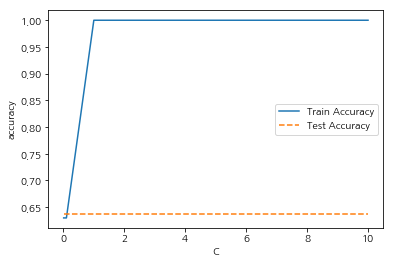

In [14]:
plt.plot(para_c, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("C")
plt.legend()

### ==> C가 1이상일 경우 train 정확도는 1(과적합)이다.
### ==> test 정확도는 변화가 없다.

#### Gamma : 훈련 샘플이 미치는 영향의 범위를 변경

In [29]:
train_accuracy = []; test_accuracy = []
para_gamma = [10 **gamma for gamma in range(-2, 2)]

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C = 0.1, random_state = 1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy

#### 결과

In [30]:
df_accuracy_gamma.round(4)

,gamma,TrainAccuracy,TestAccuracy
0,0.01,0.63,0.6374
1,0.10,0.63,0.6374
2,1.00,0.63,0.6374
3,10.00,0.63,0.6374


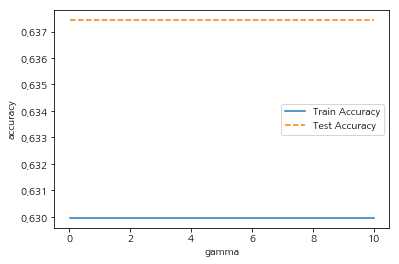

In [31]:
plt.plot(para_gamma, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_gamma, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("gamma")
plt.legend()

### ==> gamma의 변화가 정확도에 영향을 미치지 않는다.

#### Standardscaler : 설명변수 값의 구간을 동일하게 변경

In [32]:
v_feature_names = df_train_x.columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns=v_feature_names)
df_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


#### 데이터 분할

In [33]:
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size = 0.3,random_state = 1234)
print("train data X size : {}".format(df_scaled_train_x.shape))
print("train data Y size : {}".format(df_scaled_test_x.shape))

train data X size : (398, 30)
train data Y size : (171, 30)


In [34]:
df_scaled_train_x, df_scaled_val_x =  train_test_split(df_scaled_train_x,test_size =0.4285,random_state =1234)
print("scaled train data X size: {}".format(df_scaled_train_x.shape))
print("scaled valid data X size: {}".format(df_scaled_test_x.shape))

scaled train data X size: (227, 30)
scaled valid data X size: (171, 30)


#### scale이 조정된 데이터로 새로운 모델 생성

In [35]:
svm_scaled = SVC(random_state=1234)
svm_scaled.fit(df_scaled_train_x, df_train_y)
print("Accuracy on training set: {:.3f}".format(svm_scaled.score(df_scaled_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(svm_scaled.score(df_scaled_test_x, df_test_y)))

Accuracy on training set: 0.996
Accuracy on test set: 0.561


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


#### C:규제에 대한 강도 변경

In [36]:
train_accuracy = []; test_accuracy = []
para_c = [10 **c for c in range(-2, 2)]

for v_C in para_c:
    svm = SVC(C = v_C, random_state = 1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))

df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/

In [37]:
df_accuracy_c.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.01,0.630,0.637
1,0.10,0.974,0.567
2,1.00,0.996,0.561
3,10.00,0.996,0.561


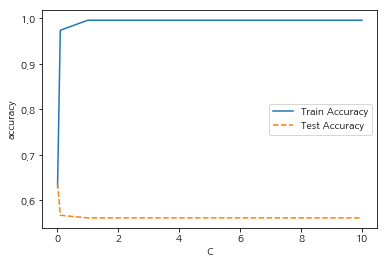

In [38]:
plt.plot(para_c, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("C")
plt.legend()

#### Gamma : 훈련 샘플이 미치는 영향의 범위를 변경 결과

In [39]:
train_accuracy = []; test_accuracy = []
para_gamma = [10 **gamma for gamma in range(-2, 2)]

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C = 1, random_state = 1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))

df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy

In [40]:
df_accuracy_gamma.round(3)

,gamma,TrainAccuracy,TestAccuracy
0,0.01,0.987,0.567
1,0.10,0.996,0.556
2,1.00,1.000,0.643
3,10.00,1.000,0.637


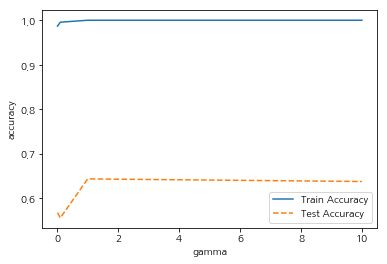

In [41]:
plt.plot(para_gamma, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_gamma, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("gamma")
plt.legend()

### ==> 과적합되지 않았다.

#### 최종 모델 선택

In [42]:
svc_final = SVC(gamma = 0.1, C = 1, random_state=1234)
svc_final.fit(df_scaled_train_x, df_train_y)
y_pred = svc_final.predict(df_scaled_test_x)

print("Accucary on training set: {:.3f}".format(svc_final.score(df_scaled_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}\n".format(svc_final.score(df_scaled_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accucary on training set: 0.996
Accuracy on test set: 0.556

Confusion matrix: 
[[70 39]
 [37 25]]


#### GridSearchCV를 이용한 최적 parameter 찾기

In [45]:
estimator = SVC(random_state=1234)
param_grid = {"C": para_c,
              "gamma": para_gamma}
grid_rf = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs = -1)
grid_rf.fit(df_scaled_train_x, df_train_y)
print("best estimator model: \n{}".format(grid_rf.best_estimator_))
print("\nbest parameter: \n{}".format(grid_rf.best_params_))
print("\nbest score: \n{}".format(grid_rf.best_score_.round(3)))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


best estimator model: 
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=1234, shrinking=True,
  tol=0.001, verbose=False)

best parameter: 
{'C': 10, 'gamma': 0.01}

best score: 
0.982


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### ==> C가 10 , gamma 가 0.01일때 0.982로 정확도가 가장 높다.